In [28]:
import os
import pandas as pd
import lyricsgenius as lg
import spotipy
import time
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

In [29]:
spotipy_client_id = 'c3e43077142f4e7bb70601747bd1f0d2'
spotipy_client_secret = '925f7025c8e6420f9be665401784c0f6'
spotipy_redirect_uri = 'https://google.com'
genius_access_token = 'jVHnDFkBvrvEsj_M8YUxbQ9t8mo2zIG19giBxlX_g7NeRz4W51gedM1YHTBX_U-4'

In [104]:
df = pd.read_csv('csv_files/happy_sad.csv')

In [105]:
df['mood'].value_counts()

sad      98
happy    97
Name: mood, dtype: int64

# Plotting

Text(0.5, 0, 'Moods')

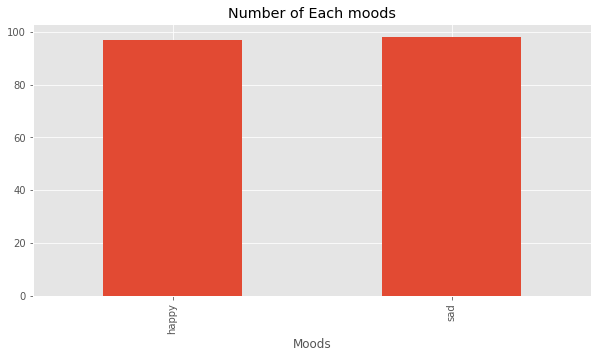

In [106]:
graph = df['mood'].value_counts().sort_index().plot(kind='bar',title='Number of Each moods',figsize=(10,5))
graph.set_xlabel('Moods')

# <b>Data Preprocessing</b>

### <b>1.Data Cleaning</b>

#### Checking for missing values


In [107]:
df.isna().sum()

Unnamed: 0          0
track               0
artists             0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
lyrics              0
mood                0
dtype: int64

In [108]:
df.dropna(how='any',inplace=True)

#### Checking for Duplicate values

In [109]:
df['track'].duplicated().sum()


0

In [110]:
df.drop_duplicates(subset='track',keep='last',inplace=True)


### <b>2.Tokenization</b>

In [111]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91635\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
def preprocessText(text, remove_stops=False):
    
    # Remove everything between hard brackets
    text = re.sub(pattern="\[.+?\]( )?", repl='', string=text)

    # Change "walkin'" to "walking", for example
    text = re.sub(pattern="n\\\' ", repl='ng ', string=text)

    # Remove x4 and (x4), for example
    text = re.sub(pattern="(\()?x\d+(\))?", repl=' ', string=text)

    # Fix apostrophe issues
    text= re.sub(pattern="\\x91", repl="'", string=text)
    text = re.sub(pattern="\\x92", repl="'", string=text)
    text= re.sub(pattern="<u\+0092>", repl="'", string=text)
    
    # Make lowercase
    text = text.lower()

    # Remove \n from beginning
    text = re.sub(pattern='^\n', repl=' ', string=text)

    # Strip , ! ?, : and remaining \n from lyrics
    text = ''.join([char.strip(",!?:") for char in text])
    text = text.replace('\n', '  ')
    
    # Remove contractions
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"let\’s", "let us", text)
    text = re.sub(r"ain't", "aint", text)
    text = re.sub(r"ain\’t", "aint", text)
    text = re.sub(r"wanna", "want to", text)
    text = re.sub(r"gonna", "going to", text)
    text = re.sub(r"gotta", "go to", text)
    
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\â", "a", text)
    
    # Remove Symbols
    text = re.sub(r"[^\w\s]","", text)
    
    # remove single char
    text = re.sub(r"\b[a-zA-Z]\b","", text)
   
    #remove number
    text = re.sub(r"\d+", "", text)
    
    #remove duplicate char(oohhh,ohhhh,oohhhh,etc)
    text = re.sub(r"o+h", "oh", text)
    text = re.sub(r"oh+", "", text)
    
    # Remove remaining punctuation
    punc = string.punctuation
    text = ''.join([char for char in text if char not in punc])

    # Remove double spaces and beginning/trailing whitespace
    text = re.sub(pattern='( ){2,}', repl=' ', string=text)
    text = text.strip()
    
    return(text)

df['lyrics'] = df['lyrics'].apply(preprocessText)

# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['lyrics_tokens']= df['lyrics'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['lyrics_tokens'])

Tokenizing Result : 

0      [translationsportuguêsi, am, good, blue, lyric...
1      [made, you, look, lyrics, could, have, my, guc...
2      [aint, worried, lyrics, do, not, know, what, y...
3      [translationstürkçesvenskaespañolslovenčinaрус...
4      [translationsdeutschtürkçeespañolportuguêspols...
                             ...                        
190    [translationsespañolprom, dress, lyrics, am, n...
191    [skinny, love, lyrics, come, on, skinny, love,...
192    [drunk, lyrics, all, my, friends, are, drunk, ...
193    [translationstürkçeespañolрусскийdeutschfrança...
194    [leave, light, on, lyrics, the, second, someon...
Name: lyrics_tokens, Length: 195, dtype: object


### <b>3.Stopwords Removal</b>

In [113]:
# Stopwords Removal
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['lyrics_tokens_preprocessing'] = df['lyrics_tokens'].apply(lambda x: [item for item in x if item not in stop])

### <b>4.Lemmatization</b>

In [114]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['lyrics_tokens_preprocessing'] = df['lyrics_tokens_preprocessing'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

### <b>5.Stemming</b>

In [115]:
# stemming
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
df['lyrics_tokens_preprocessing'] = df['lyrics_tokens_preprocessing'].apply(lambda x: [stemmer.stem(y) for y in x])

# Vader Algorithm

In [121]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

sentiment_list = []
sentiment_score_list = []

for i in df['lyrics']:
    try:
        sentiment_score = analyser.polarity_scores(i)

        if sentiment_score['compound'] >= 0.2:
            sentiment_percentage = sentiment_score['compound']
            sentiment = 'Positive'
        elif sentiment_score['compound'] > -0.2 and sentiment_score['compound'] < 0.2:
            sentiment_percentage = sentiment_score['compound']
            sentiment = 'Neutral'
        elif sentiment_score['compound'] <= -0.2:
            sentiment_percentage = sentiment_score['compound']
            sentiment = 'Negative'

        sentiment_list.append(sentiment)
        sentiment_score_list.append((abs(sentiment_percentage) * 100))
        
    except:
        sentiment_list.append('None')
        sentiment_score_list.append(0)

df['Sentiment'] = sentiment_list
df['Sentiment_Score'] = sentiment_score_list


In [122]:
df

,Unnamed: 0,track,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics,mood,lyrics_tokens,lyrics_tokens_preprocessing,Sentiment,Sentiment_Score
0,0,I'm Good (Blue),David Guetta,0.561,0.965,7,-3.673,0.0343,0.00383,0.000007,0.3710,0.304,128.040,translationsportuguêsi am good blue lyrics am ...,happy,"[translationsportuguêsi, am, good, blue, lyric...","[translationsportuguêsi, good, blue, lyric, go...",Positive,99.79
1,1,Made You Look,Meghan Trainor,0.838,0.525,10,-3.562,0.0665,0.34500,0.000002,0.0771,0.884,144.981,made you look lyrics could have my gucci on co...,happy,"[made, you, look, lyrics, could, have, my, guc...","[made, look, lyric, could, gucci, could, wear,...",Positive,77.83
2,2,I Ain't Worried,OneRepublic,0.704,0.797,0,-5.927,0.0475,0.08260,0.000745,0.0546,0.825,139.994,aint worried lyrics do not know what you have ...,happy,"[aint, worried, lyrics, do, not, know, what, y...","[aint, worri, lyric, know, told, time, run, ne...",Positive,99.66
3,3,Blinding Lights,The Weeknd,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,translationstürkçesvenskaespañolslovenčinaрусс...,happy,[translationstürkçesvenskaespañolslovenčinaрус...,[translationstürkçesvenskaespañolslovenčinaрус...,Neutral,10.68
4,4,Watermelon Sugar,Harry Styles,0.548,0.816,0,-4.209,0.0465,0.12200,0.000000,0.3350,0.557,95.390,translationsdeutschtürkçeespañolportuguêspolsk...,happy,[translationsdeutschtürkçeespañolportuguêspols...,[translationsdeutschtürkçeespañolportuguêspols...,Positive,97.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,93,prom dress,mxmtoon,0.560,0.674,10,-6.048,0.0446,0.69800,0.000000,0.1230,0.421,119.942,translationsespañolprom dress lyrics am nearin...,sad,"[translationsespañolprom, dress, lyrics, am, n...","[translationsespañolprom, dress, lyric, near, ...",Negative,91.95
191,94,Skinny Love,Birdy,0.379,0.290,4,-8.485,0.0510,0.95200,0.001060,0.1180,0.169,166.467,skinny love lyrics come on skinny love just la...,sad,"[skinny, love, lyrics, come, on, skinny, love,...","[skinni, love, lyric, come, skinni, love, last...",Positive,98.31
192,95,drunk,keshi,0.691,0.389,4,-8.247,0.0367,0.76500,0.000000,0.0941,0.306,104.952,drunk lyrics all my friends are drunk again an...,sad,"[drunk, lyrics, all, my, friends, are, drunk, ...","[drunk, lyric, friend, drunk, stumbl, back, be...",Positive,91.92
193,96,Daylight,Joji,0.528,0.749,7,-7.571,0.0479,0.00488,0.000096,0.0949,0.729,163.944,translationstürkçeespañolрусскийdeutschfrançai...,sad,[translationstürkçeespañolрусскийdeutschfrança...,[translationstürkçeespañolрусскийdeutschfrança...,Negative,98.53


In [123]:
df['Sentiment'].value_counts()

Positive    139
Negative     52
Neutral       4
Name: Sentiment, dtype: int64

# Training Models

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [145]:
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment']) 

In [146]:
df.head()

,Unnamed: 0,track,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics,mood,lyrics_tokens,lyrics_tokens_preprocessing,Sentiment,Sentiment_Score,mood_encoded
0,0,I'm Good (Blue),David Guetta,0.561,0.965,7,-3.673,0.0343,0.00383,0.000007,0.3710,0.304,128.040,translationsportuguêsi am good blue lyrics am ...,happy,"[translationsportuguêsi, am, good, blue, lyric...","[translationsportuguêsi, good, blue, lyric, go...",2,99.79,0
1,1,Made You Look,Meghan Trainor,0.838,0.525,10,-3.562,0.0665,0.34500,0.000002,0.0771,0.884,144.981,made you look lyrics could have my gucci on co...,happy,"[made, you, look, lyrics, could, have, my, guc...","[made, look, lyric, could, gucci, could, wear,...",2,77.83,0
2,2,I Ain't Worried,OneRepublic,0.704,0.797,0,-5.927,0.0475,0.08260,0.000745,0.0546,0.825,139.994,aint worried lyrics do not know what you have ...,happy,"[aint, worried, lyrics, do, not, know, what, y...","[aint, worri, lyric, know, told, time, run, ne...",2,99.66,0
3,3,Blinding Lights,The Weeknd,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,translationstürkçesvenskaespañolslovenčinaрусс...,happy,[translationstürkçesvenskaespañolslovenčinaрус...,[translationstürkçesvenskaespañolslovenčinaрус...,1,10.68,0
4,4,Watermelon Sugar,Harry Styles,0.548,0.816,0,-4.209,0.0465,0.12200,0.000000,0.3350,0.557,95.390,translationsdeutschtürkçeespañolportuguêspolsk...,happy,[translationsdeutschtürkçeespañolportuguêspols...,[translationsdeutschtürkçeespañolportuguêspols...,2,97.29,0


In [147]:
corpus = []
for sentence in df['lyrics']:
    corpus.append(sentence)

countvecterizer

In [148]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -3].values

GNB

In [149]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1,  0, 13],
       [ 0,  0,  2],
       [ 2,  0, 41]], dtype=int64)

In [151]:
nb_score = accuracy_score(y_test, y_pred)
print('accuracy',nb_score)

accuracy 0.711864406779661


In [160]:
from transformers import pipeline

In [161]:
sent_pl = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Python39\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91635\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.